In [1]:
#%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D
import math
from tqdm import tqdm
from scipy.stats import norm

In [2]:
n = 12.
b = 8.
s = 10.

In [3]:
def GetLnQ(n_,b_,s_,mu_):
    
    Q = 2.*(mu_*s_ - n_*np.log(1.+(mu_*s_/b_)))
    
    return Q

In [4]:
q = GetLnQ(n,b,s,0.59)
print(q)

-1.4587351629634426


In [20]:
def Sampler(n_,b_,s_,mu_,N=int(1e3)):
    
    H0 = np.random.poisson(b_, N)
    H1 = np.random.poisson(b_+mu_*s_,N)
    
    Obs = GetLnQ(n_,b_,s_,mu_)
    
    q0 = GetLnQ(H0,b_,s_,mu_)
    q1 = GetLnQ(H1,b_,s_,mu_)
    
    return Obs, q0, q1

In [21]:
def GetHisto(l_,bins_, norm=True):
    
    H1, bines = np.histogram(l_,bins=bins_)
    w = np.diff(bines)
    
    if norm:
        H1 = H1 / (np.sum(H1*w))
    
    return H1,bines,w

In [22]:
def GetPvalue(H,bins,w,Obs):
    
    p = 0.

    for i in range(len(H)):
    
        if bins[i] >= Obs:
             p += H[i]*w[i]
    
    return p

In [23]:
def GetCL(n_,b_,s_,mu_,N=int(1e4),CL=1.0):
      
    Obs, q0, q1 = Sampler(n_,b_,s_,mu_)
    
    bins = np.linspace(-100,100,10000)
    
    Hq0, bq0, wq0 = GetHisto(q0,bins,True)
    Hq1, bq1, wq1 = GetHisto(q1,bins,True)
    HO, bO, wO = GetHisto(Obs,bins,True)
    
    HO = HO/ (np.sum(HO*wO)) * 0.2
    
    
    p0 = GetPvalue(Hq0,bq0,wq0,Obs)
    p1 = GetPvalue(Hq1,bq1,wq1,Obs)
    
    
    if p0 != 0.:
        CL = p1/p0
    
    #print(CL)
    
    #plt.plot(bq0[0:-1],Hq0, color='k')
    #plt.bar(bq0[0:-1],Hq0,width=wq0, color='b',ec='k')
    #plt.bar(bq1[0:-1],Hq1,width=wq1, color='r',ec='k')
    #plt.bar(bO[0:-1],HO,width=wO, color='g',ec='g')
    
    #plt.close()
    #plt.yscale('log')
    
    
    return CL

In [24]:
def GetMethod(n_,b_,s_):
    
    POI = np.linspace(0.,4.0,41)
    CL = np.zeros(len(POI))
    p = np.zeros(len(POI))
    
    #for i in tqdm(range(len(POI))):
    for i in range(len(POI)):
        CL[i] = GetCL(n_,b_,s_,POI[i])
        p[i] = 0.05
    
    ii = CL <= 0.05 
    #print(CL[ii][0], POI[ii][0])
    
    mup = POI[ii][0]
   
    return mup

In [38]:
GetMethod(b,b,s)

0.7000000000000001

In [26]:
CL = GetCL(n,b,s,0.02)
print(CL)

S = norm.ppf(1.-CL)
print(S)

1.0057537399309537
nan


# Muestrear mup dada la hipotesis nula

$$ f(\mu^{up}/0) $$

In [35]:
mup = []

for i in tqdm(range(50)):
    
    ntest = np.random.poisson(b)
    #ntest = np.random.poisson(n)
    
    mup.append(GetMethod(ntest,b,s))


100%|██████████| 50/50 [00:15<00:00,  3.31it/s]


(array([0.33333333, 1.        , 2.16666667, 1.33333333, 0.66666667,
        1.5       , 0.66666667, 0.16666667, 0.16666667, 0.33333333]),
 array([0.3 , 0.42, 0.54, 0.66, 0.78, 0.9 , 1.02, 1.14, 1.26, 1.38, 1.5 ]),
 <a list of 10 Patch objects>)

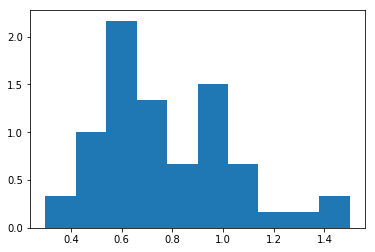

In [39]:
plt.hist(mup, density=True)

In [40]:
print(np.percentile(mup,50), np.percentile(mup,50)- np.percentile(mup,16),np.percentile(mup,94)-np.percentile(mup,50))

(0.7000000000000001, 0.11599999999999999, 0.5059999999999995)


In [31]:
#plt.plot(POI,CL)
#plt.plot(POI,p,'r--',linewidth=2)
#plt.grid()
#plt.ylim(0.01,0.25)
#plt.yscale('log')
#plt.show()

In [32]:
# P-value para calcular la significancia de la señal




In [33]:
#Para encontrar la probabilida en desviaciones estandar

sigma = norm.cdf(3)
alpha = 1.-sigma
print(sigma,alpha)

(0.9986501019683699, 0.0013498980316301035)
